In [25]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from matplotlib import rcParams

In [26]:
rcParams["figure.figsize"] = 20, 20
rcParams["font.size"] = 20

In [27]:
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target

In [28]:
models = (
    svm.SVC(kernel="linear", C=1.0),
    svm.LinearSVC(C=1.0, max_iter=10_000),
    svm.SVC(kernel="rbf", gamma=0.7, C=1.0),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0)
)

In [29]:
models = (clf.fit(x, y) for clf in models)

In [30]:
titles = ("SVC with Linear",
         "LinearSVC",
         "SVC with RBF",
         "SVC with Poly")

FUNCTIONS FROM SKLEARN WEBSITE

In [31]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

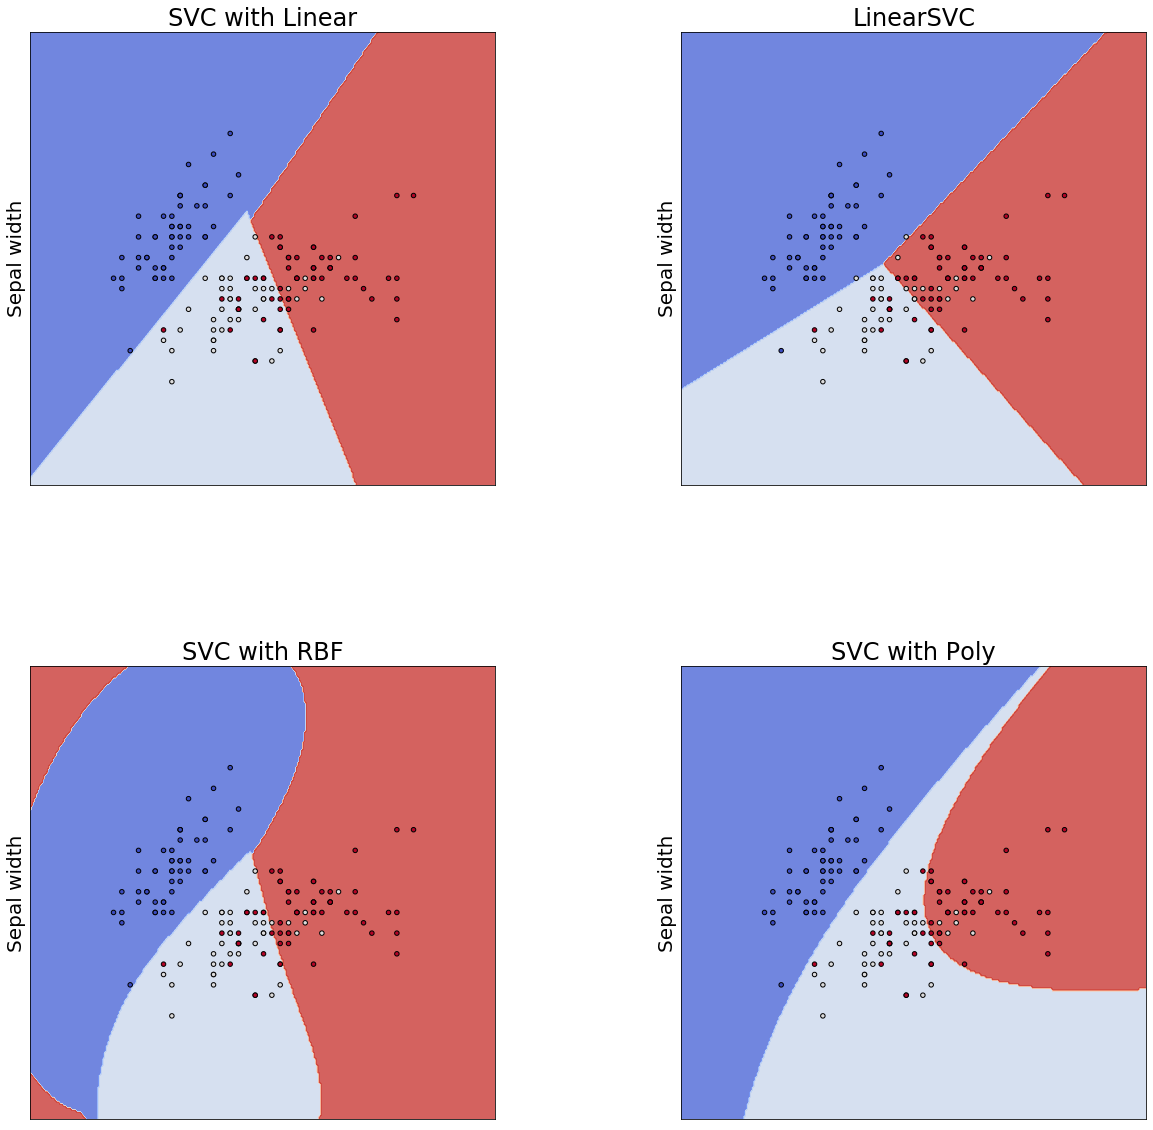

In [32]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

Różnica między `LinearSVC` a zwykłym `SVC(kernel="linear")`

`LinearSVC` minimalizuje squared hinge loss, a `SVC` regular hinge loss.
`LinearSVC` używa One-vs-All multiclass reduction, a SVC używa One-vs-One multiclass reduction